# Linear Regression Project

For this project, you'll be doing the [Bike Sharing Demand Kaggle](https://www.kaggle.com/c/bike-sharing-demand) competition. We won't submit any results to the competition, but feel free to explore Kaggle more in depth on your own time. The main point of this project is to get you feeling comfortable with Exploratory Data Analysis and begin to get an understanding that sometimes certain modles are not a good choice for a data set. In this case, we will discover that Linear Regression may not be the best choice given our data! 

In [2]:
library(ggplot2)
library(ggthemes)
library(dplyr)
library(corrplot)
library(corrgram)

## Instructions
__Just complete the tasks outlined below__

## Get the Data
You can download the data or just use the supplied csv file in the repo. The data has the following features:

- datetime-hourly date + timestamp
- season - 1 =spring, 2 = summer, 3 = fall, 4 = winter
- holidy - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
   - 1: Clear
   - 2: Cloudy
   - 3: Light Snow, Light Rain
   - 4: Heavy Snow, Heavy Rain
- temp - temperature in Celcius
- atemp - "feels like" temperature in Celcius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registed user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

__Read the bikeshare.csv file and set it to a dataframe called bike__

In [3]:
bike <- read.csv("bikeshare.csv")

__Check the head of bike__

In [4]:
head(bike)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


Can you figure out what is the target we are trying to predict? Check the Kaggle Link above if you are confused.

### Exploratory Data Analysis
__Create a scatter plot of count vs temp. Set a good alpha value.__

__Plot count verses datetime as a scatterplot with a color gradient based on temperature. You'll need to coerse the datetime column into POSIXct before plotting.__

__Hopefully you noticed two things. A seasonality to the data, for winter and summer. Also that bike rental counts are increasing in general. This may present a problem with using a linear regression model if the data is non-linear! Let's have a quick overview of pros and cons right now of linear regression:__

__Pros:__
 - Simple to explain
 - Highly interpretable
 - Model training and predictions are very fast
 - No tuning is required (excluding regularization)
 - Features don't need scaling
 - Can perform wel with a small number of observations
 - Very well understood
 
__Cons:__
 - Assumes a linear relationship between features and the expected return
 - Performance is (generally) not competitive with the best supervised learning methods due to high bias
 - Can't automatically learn feature interactions
 
 __We can keep this in mind as we continue on, but maybe when we learn more about algorithms we can come back to this problem with some new tools. But for now, let's try using linear regression__

__What is the correlation between temp and count?__

__Let's explore the season data. Create a boxplot, with the y axis indicating count and the x axis begin a box for each season.__

__Notice what this says:__
- A line can't capture a non-linear relationship.
- There are more rentals in winter than in spring

__We know of these issues because of the growth of the rental counts, this isn't due to the actual seasons!__

## Feature Engineering

A lot of times, you'll need to use domain knowledge and experience to engineer and create new features. Let's go ahead and engineer some new features from the datetime column

Create an "hour" column that takes the hours from the datetime column. You'll probably need to apply some function to the entire datetime column and reassign it. Hint

``` time.stamp <- bike$datetime[4]
    format(time.stamp, %H")
```

__Now create a scatterplot of counts versus hour, with color scale based on temp. Only use bike data where workingday == 1__

__Optional additions__
- __Use the additional layer: scale_color_gradientn(colors = c("color1","color2","color3")) where the color arguments is a vector gradient of colors you choose, not just high and low__
- __Use position= position_jitter(w=1, h=0) inside of geom_point() and check out what is does__

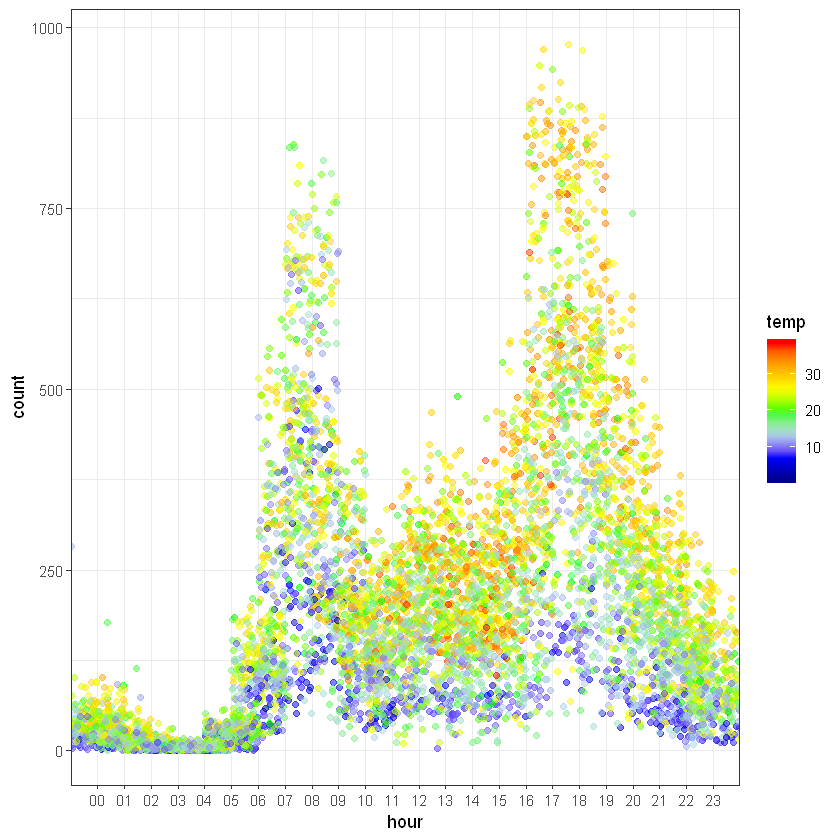

__Now create the same plot for non working days:__

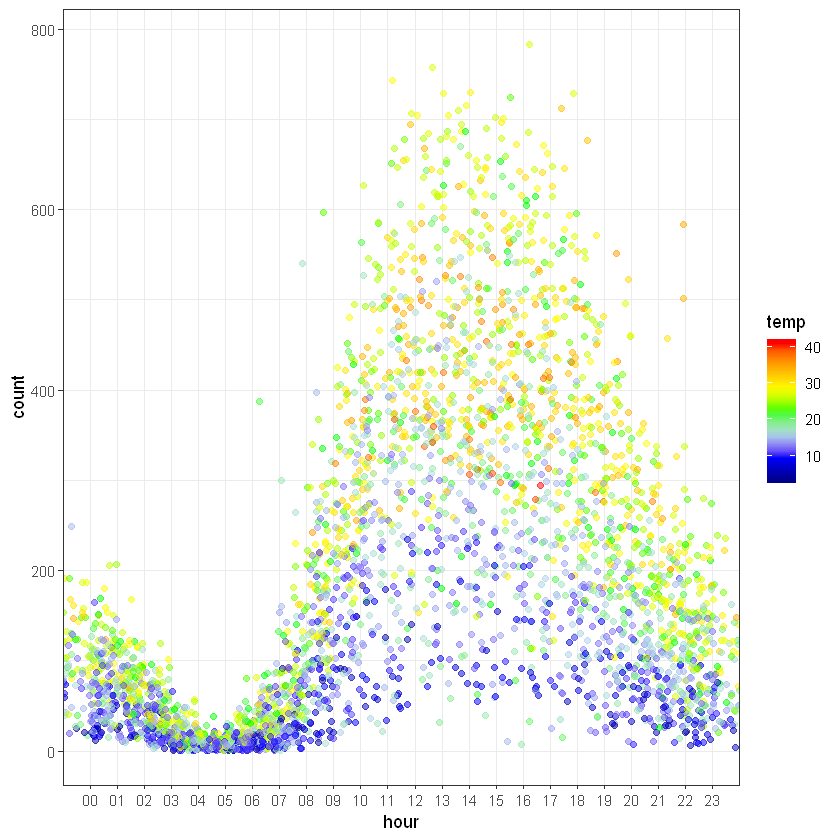

__You should have noticed that working days have peak activity during the morning (~8am) and right after work gets out (~5pm), with some lunchtime activity. While the non-work days have a steady rise and fall for the afternoon__

__Now let's continue by trying to build a model, we'll begin by just looking at a single feature.__

## Building the Model
__Use lm() to build a model that predicts count based solely on the temp feature, name it temp.model__

__Get the summary of the temp model__


Call:
lm(formula = count ~ temp, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


__You should have gotten 6.0462 as the intercept and 9.17 as the temp coeffecient. How can you interpret these values? Do some wikipedia research, re-read ISLR, or revisit the Linear Regression lecture notebook for more on this.__

### Interpreting the intercept (β0):
- It is the value of y when x=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- Note: It does not always make sense to interpret the intercept.

### Interpreting the "temp" coefficient (β1):
- It is the change in y divided by change in x, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is associated with a rental increase of 9.17 bikes.
- This is not a statement of causation.
- β1 would be negative if an increase in temperature was associated with a decrease in rentals.

__How many bike rentals would we predict if the temperature was 25 degrees Celsius? Calculate this two ways:__

- Using the values we just got above
- Using the predict() function

__You should get around 235.3 bikes.__

[1] 235.3087

1 
235.3097

__Use sapply() and as.numeric to change the hour column to a column of numeric values.__

__Finally build a model that attempts to predict count based off of the following features. Figure out if theres a way to not have to pass/write all these variables into the lm() function.__

- season
- holiday
- workingday
- weather
- temp
- humidity
- windspeed
- hour (factor)

__Get a summary of the model__


Call:
lm(formula = count ~ . - casual - registered - datetime - atemp, 
    data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16
